# Causal Inference with DoubleML

In [1]:
#!pip install torch-geometric-temporal

## 1. Generate synthetic data

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_graph(df, timestep):
    # Filter dataframe for the given timestep
    df_timestep = df[df['col_date'] == timestep]

    # Initialize a directed graph
    G = nx.DiGraph()

    # Add nodes for col_target and features
    nodes = ['col_target', 'col_feature1', 'col_feature2', 'col_feature3']
    G.add_nodes_from(nodes)

    # Add edges
    for index, row in df_timestep.iterrows():
        G.add_edge('col_target', row['col_feature1'])
        G.add_edge('col_target', row['col_feature2'])
        G.add_edge('col_target', row['col_feature3'])
        G.add_edge('col_feature2', row['col_feature3'])

    return G

def plot_graph(G):
    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold')

    # Draw edge labels
    edge_labels = {(u, v): f"{u}->{v}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Show plot
    plt.title("Graph for One Timestep")
    plt.axis('off')
    plt.show()

In [7]:
# Generate synthetic data
np.random.seed(0)
n_samples = 100
n_groups = 3

data = pd.DataFrame({
    'col_target': np.random.randn(n_samples),
    'col_date': pd.date_range(start='2024-01-01', periods=n_samples),
    'col_feature1': np.random.randn(n_samples),
    'col_feature2': np.random.randn(n_samples),
    'col_feature3': np.random.randn(n_samples),
    #'col_group': np.random.randint(0, n_groups, n_samples)
})
data['col_date'] = data['col_date'].dt.date
data.head()

,col_target,col_date,col_feature1,col_feature2,col_feature3
0,1.764052,2024-01-01,1.883151,-0.369182,-1.306527
1,0.400157,2024-01-02,-1.347759,-0.239379,1.658131
2,0.978738,2024-01-03,-1.270485,1.099660,-0.118164
3,2.240893,2024-01-04,0.969397,0.655264,-0.680178
4,1.867558,2024-01-05,-1.173123,0.640132,0.666383


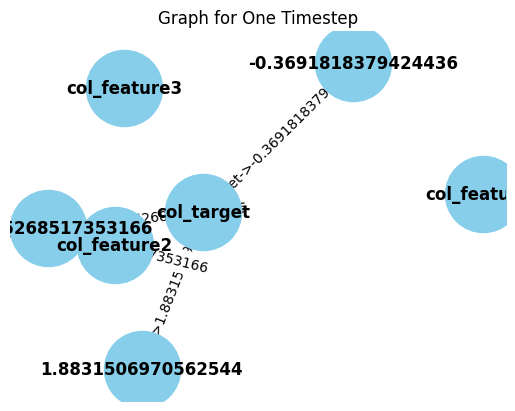

In [9]:
# Create and plot the graph
timestep = pd.to_datetime("2024-01-01").date()
graph = create_graph(df=data, timestep=timestep)
plot_graph(graph)

In [24]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
n_samples = 100
n_groups = 3

data = pd.DataFrame({
    'col_target': np.random.randn(n_samples),
    'col_date': pd.date_range(start='2024-01-01', periods=n_samples),
    'col_feature1': np.random.randn(n_samples),
    'col_feature2': np.random.randn(n_samples),
    'col_feature3': np.random.randn(n_samples),
    'col_group': np.random.randint(0, n_groups, n_samples)
})
data['col_date'] = data['col_date'].dt.date

# Create a graph
def create_graph(df):
    graph = nx.Graph()
    for _, row in df.iterrows():
        target_node = (row['col_target'], row['col_group'], row['col_date'])
        feature_nodes = [(row['col_feature1'], row['col_group'], row['col_date']),
                         (row['col_feature2'], row['col_group'], row['col_date']),
                         (row['col_feature3'], row['col_group'], row['col_date'])]
        graph.add_node(target_node)
        for feature_node in feature_nodes:
            graph.add_node(feature_node)
            graph.add_edge(target_node, feature_node)
    return graph

In [27]:
display(data.head())

,col_target,col_date,col_feature1,col_feature2,col_feature3,col_group
0,1.764052,2024-01-01,1.883151,-0.369182,-1.306527,1
1,0.400157,2024-01-02,-1.347759,-0.239379,1.658131,0
2,0.978738,2024-01-03,-1.270485,1.099660,-0.118164,2
3,2.240893,2024-01-04,0.969397,0.655264,-0.680178,1
4,1.867558,2024-01-05,-1.173123,0.640132,0.666383,0


In [ ]:
# Create and plot the graph
graph = create_graph(df, timestep)
plot_graph(graph)

,col_target,col_date,col_feature1,col_feature2,col_feature3,col_group
0,1.764052,2024-01-01,1.883151,-0.369182,-1.306527,1


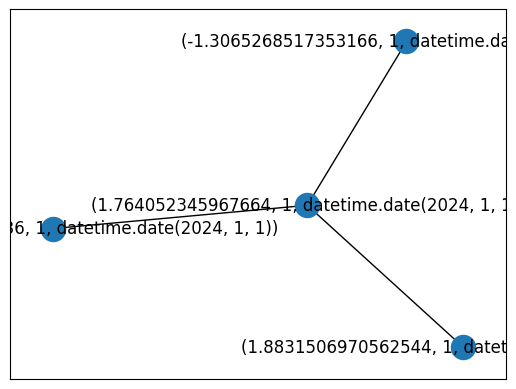

In [26]:
# Show graph exaple (one timestep)
df_point = data.head(1).copy()
display(df_point)
G = create_graph(df=df_point)
nx.draw_networkx(G, arrows=True)

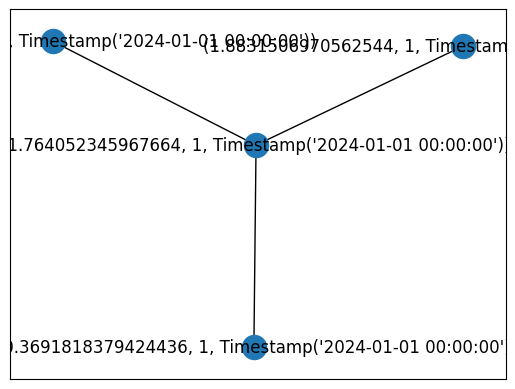

In [19]:
data

,col_target,col_date,col_feature1,col_feature2,col_feature3,col_group
0,1.764052,2024-01-01,1.883151,-0.369182,-1.306527,1
1,0.400157,2024-01-02,-1.347759,-0.239379,1.658131,0
2,0.978738,2024-01-03,-1.270485,1.099660,-0.118164,2
3,2.240893,2024-01-04,0.969397,0.655264,-0.680178,1
4,1.867558,2024-01-05,-1.173123,0.640132,0.666383,0
...,...,...,...,...,...,...
95,0.706573,2024-04-05,-0.171546,1.136891,-0.761492,2
96,0.010500,2024-04-06,0.771791,0.097725,0.857924,2
97,1.785870,2024-04-07,0.823504,0.582954,1.141102,2
98,0.126912,2024-04-08,2.163236,-0.399449,1.466579,1


In [10]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 603.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.estimators import PC, MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel

# Generate synthetic dataset
np.random.seed(0)
num_samples = 1000
num_features = 5
time_steps = 10
num_targets = 3  # Number of target features

# Generating features measured across time
features = []
for i in range(num_features):
    feature_name = f'Feature_{i}'
    feature_values = np.random.randn(num_samples, time_steps).cumsum(axis=1)
    features.append(pd.DataFrame(feature_values, columns=[f'{feature_name}_t{i}' for i in range(time_steps)]))

# Target features with changes influenced by other features
targets = []
for j in range(num_targets):
    target = np.sum([np.random.randn(num_samples, time_steps).cumsum(axis=1) * (i + 1) for i in range(num_features)], axis=0)
    target_df = pd.DataFrame(target, columns=[f'Target_{j}_t{i}' for i in range(time_steps)])
    targets.append(target_df)

# Combine all features and targets into a single DataFrame
data = pd.concat([pd.concat(targets, axis=1)] + features, axis=1)
data.head()

,Target_0_t0,Target_0_t1,Target_0_t2,Target_0_t3,Target_0_t4,Target_0_t5,Target_0_t6,Target_0_t7,Target_0_t8,Target_0_t9,...,Feature_4_t0,Feature_4_t1,Feature_4_t2,Feature_4_t3,Feature_4_t4,Feature_4_t5,Feature_4_t6,Feature_4_t7,Feature_4_t8,Feature_4_t9
0,-4.794745,12.614523,6.203218,2.086762,-2.554377,12.171575,6.749355,10.380971,9.704543,3.720069,...,-1.939500,-1.200650,0.194035,-0.619550,-1.438372,-1.541170,-0.301825,0.062452,-1.104185,-1.608013
1,0.797820,-5.885690,-1.325385,0.745993,4.485702,-4.761958,-12.808708,-5.704808,-18.996423,-19.993462,...,0.111410,-1.423292,-2.007424,-2.809179,-3.001399,-3.346442,-2.959924,-4.186354,-3.598315,-3.362473
2,-8.685957,-8.255115,-8.733273,-13.728065,-5.626715,-8.761423,-16.613443,-21.359026,-15.687398,-12.892296,...,0.922925,-1.584920,-1.173304,-0.556336,-0.163087,0.571891,0.468541,1.015800,0.164917,0.588873
3,2.607663,4.753440,3.223106,3.630515,3.632574,4.197120,15.490469,17.664220,19.771153,24.541384,...,1.775568,1.825432,1.829415,0.728122,0.657824,0.707854,1.698968,-0.432754,-0.413816,-1.700532
4,4.210039,3.460649,2.566901,-4.084022,6.118321,25.239932,35.947255,22.332852,37.318675,28.383592,...,0.564948,1.141953,1.800014,3.272345,3.284895,4.074187,4.600260,5.328731,6.248622,6.685612


  0%|          | 0/5 [00:00<?, ?it/s]

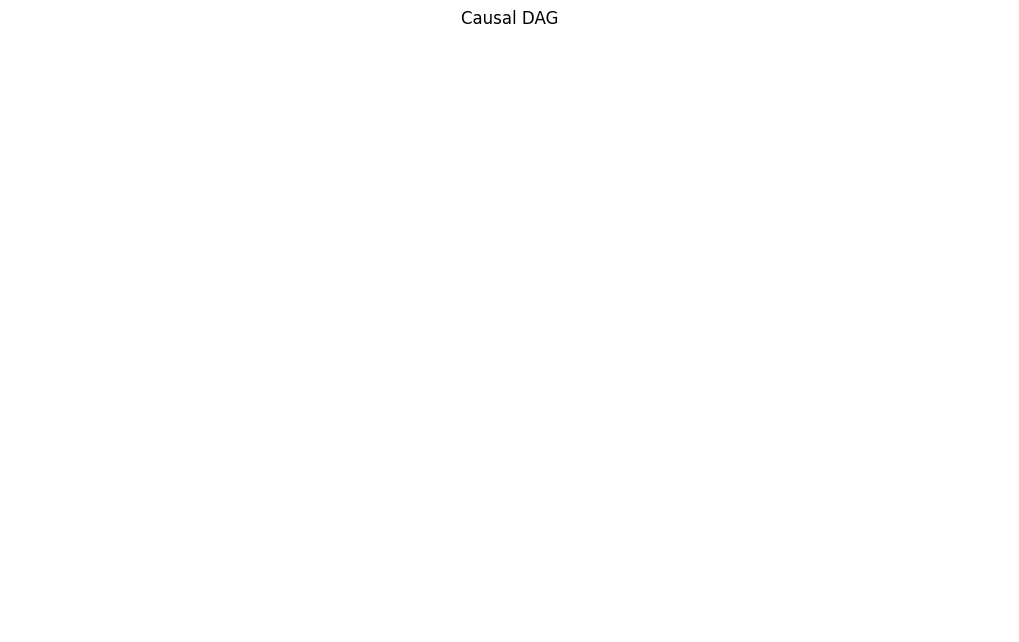

In [14]:
# Learn the DAG using PC algorithm
estimator = PC(data)
model = estimator.estimate(return_type='dag')

# Plot the DAG
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(model)
nx.draw(model, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title('Causal DAG')
plt.show()

In [15]:
# Analyze the DAG to determine feature importance for each target
feature_importance = {node: set(model.predecessors(node)) for node in model.nodes() if 'Target' in node}
print("Feature importance for each target:")
for target, features in feature_importance.items():
    print(f"{target}: {', '.join(features)}")

Feature importance for each target:
